In [452]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

folder = '../../Gridsearch_300720'

csvs = []

count_nan = 0
for i, file in enumerate(os.listdir(folder + '/csvs')):
    df = pd.read_csv(folder + '/csvs' + '/' + file)
    if (df.batch_size == 64).any():
        df.rename(columns={'Unnamed: 0' : 'epoch'}, inplace=True)
        count_nan += df.shape[0] * df.shape[1] - np.sum(df.count())
        df['list_index'] = len(csvs)
        csvs.append(df)

print(f"Total number of Nans: {count_nan}")

Total number of Nans: 2


In [453]:
nan_index = []
for i, df in enumerate(csvs):
    nan_index.append(list(df[(df['val_acc'].isnull()) | (df['train_acc'].isnull()) |(df['train_updates'].isnull()) | (df['val_updates'].isnull())].index))

print(nan_index)

[[], [], [], [], [], [], [], [], [], [], [], [], [28, 32], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]


In [454]:
weird_acc = []
for i, df in enumerate(csvs):
    weird_acc.append(list(df[(df['val_acc']>1) | (df['val_acc']<0) | (df['train_acc']>1) | (df['train_acc']<0)].index))
# for df in csvs:
#     df.drop(df[(df['val_acc']>1) | (df['val_acc']<0)].index, inplace = True)

see = [csvs[i].iloc[l[0]] for i, l in enumerate(weird_acc) if l]

early_stopped_dfs = []
for i in range(len(csvs)):
    n = nan_index[i]
    v = weird_acc[i]
    if n and v:
        early_stopped_dfs.append(csvs[i].iloc[[min(min(v), min(n))]])
    elif n:
        early_stopped_dfs.append(csvs[i].iloc[[min(n)]])
    elif v:
        early_stopped_dfs.append(csvs[i].iloc[[min(v)]])

In [455]:
early_stopped = pd.concat(early_stopped_dfs)
early_stopped.drop(columns=['val_acc', 'train_acc', 'val_updates', 'train_updates', 'early_stopping'], inplace=True)
early_stopped
# csvs[0].columns
# csvs[2]
# for df in csvs:
#     print(len(df))

,epoch,batch_size,cost_per_sample,hidden_units,learning_rate,surprisal_cost,list_index
37,37,64,0.0050,32,0.0001,0.005,4
31,31,64,0.0050,32,0.0001,0.100,5
28,28,64,0.0001,32,0.0100,0.005,12
27,27,64,0.0010,32,0.0100,0.005,14
18,18,64,0.0010,64,0.0100,0.005,32
26,26,64,0.0050,64,0.0100,0.100,35
35,35,64,0.0050,96,0.0001,0.100,41
36,36,64,0.0050,96,0.0010,0.005,46
28,28,64,0.0050,96,0.0100,0.100,53


In [456]:
manual_early_stopping = {4: 36,5: 28, 12: 12, 14:27, 32:18, 35:23, 41:35, 46: 12,53:12}

for key, val in manual_early_stopping.items():
    csvs[key].drop(labels = range(val, 40), inplace=True)

In [457]:
big_df = pd.concat(csvs)
big_df.describe()

,epoch,batch_size,cost_per_sample,hidden_units,learning_rate,surprisal_cost,val_acc,val_updates,train_acc,train_updates,list_index
count,2003.000000,2003.0,2003.000000,2003.000000,2003.000000,2003.000000,2.003000e+03,2.003000e+03,2003.000000,2.003000e+03,2003.000000
mean,18.800799,64.0,0.001939,63.936096,0.003436,0.053283,4.249048e-01,4.497652e+02,0.436946,4.447758e+02,26.145781
std,11.507794,0.0,0.002098,26.003533,0.004371,0.047505,3.259870e-01,9.077568e+02,0.318461,8.860975e+02,15.414737
min,0.000000,64.0,0.000100,32.000000,0.000100,0.005000,0.000000e+00,0.000000e+00,0.000000,-4.667602e-313,0.000000
25%,9.000000,64.0,0.000100,32.000000,0.000100,0.005000,6.611809e-316,6.936923e-310,0.005000,1.134156e-315,13.000000
50%,18.000000,64.0,0.001000,64.000000,0.001000,0.100000,4.991987e-01,1.061889e+01,0.502204,1.844017e+01,26.000000
75%,29.000000,64.0,0.005000,96.000000,0.010000,0.100000,7.430889e-01,1.708466e+02,0.752170,1.780311e+02,39.000000
max,39.000000,64.0,0.005000,96.000000,0.010000,0.100000,8.610777e-01,2.520000e+03,0.906717,2.520000e+03,53.000000


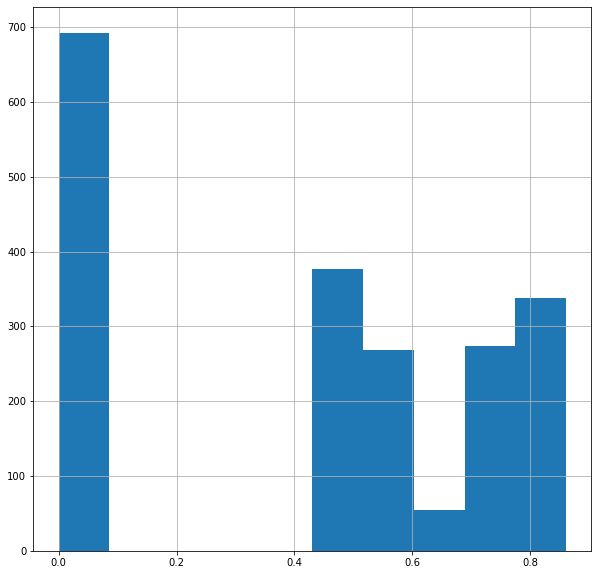

In [458]:
big_df['val_acc'].hist(figsize=(10, 10))

In [459]:
best_rows = []
best_accs = []
for df in csvs:
    best_accs.append(df.loc[:, 'val_acc'].max())
    best_rows.append(df.loc[df.loc[:, 'val_acc'].argmax()].to_dict())

In [460]:
best_df = pd.DataFrame(best_rows)

In [461]:
print("Dataframe with all best epochs for Validation accuracy")
best_df

# bs64_best = best_df.loc[(best_df['batch_size'] == 64)]


Dataframe with all best epochs for Validation accuracy


,epoch,batch_size,cost_per_sample,hidden_units,learning_rate,surprisal_cost,early_stopping,val_acc,val_updates,train_acc,train_updates,list_index
0,39,64,0.0001,32,0.0001,0.005,yes,0.809896,164.147736,0.816106,163.879410,0
1,39,64,0.0001,32,0.0001,0.100,yes,0.821915,262.829834,0.832131,260.959991,1
2,39,64,0.0010,32,0.0001,0.005,yes,0.779447,82.189804,0.770366,74.689438,2
3,35,64,0.0010,32,0.0001,0.100,yes,0.793169,97.844353,0.788662,88.622726,3
4,22,64,0.0050,32,0.0001,0.005,yes,0.601763,7.453325,0.592682,7.341213,4
5,4,64,0.0050,32,0.0001,0.100,yes,0.572216,5.274439,0.562366,5.502003,5
6,36,64,0.0001,32,0.0010,0.005,yes,0.860677,183.186996,0.885083,169.788925,6
7,11,64,0.0001,32,0.0010,0.100,yes,0.845052,253.890823,0.848357,250.349228,7
8,9,64,0.0010,32,0.0010,0.005,yes,0.818209,175.581726,0.794605,146.978973,8
9,28,64,0.0010,32,0.0010,0.100,yes,0.833033,96.858170,0.816106,74.164528,9


In [462]:
# temp = bs64_best.loc[(best_df['hidden_units']==96)]

C:\Users\emyms\anaconda3\envs\skiprnn-2017-telecombcn\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\emyms\anaconda3\envs\skiprnn-2017-telecombcn\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\emyms\anaconda3\envs\skiprnn-2017-telecombcn\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 fi

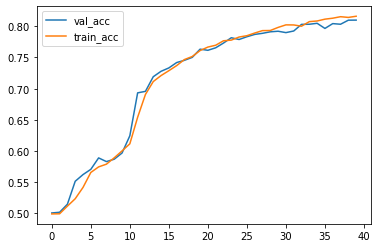

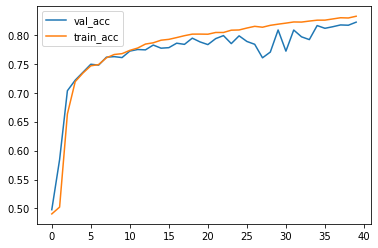

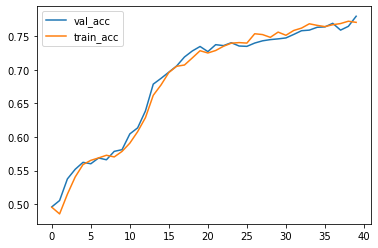

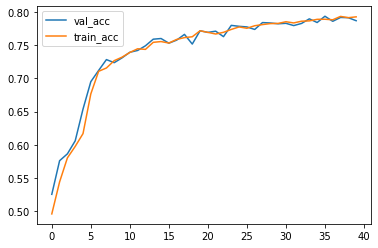

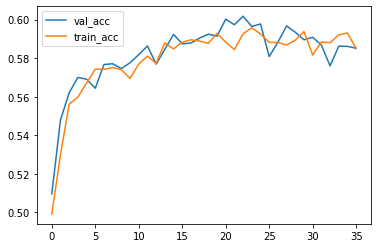

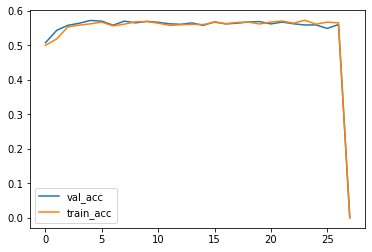

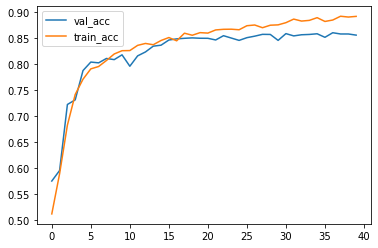

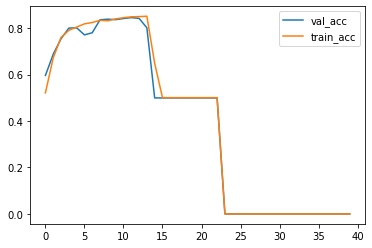

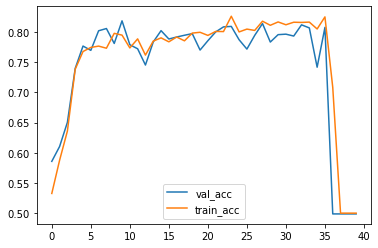

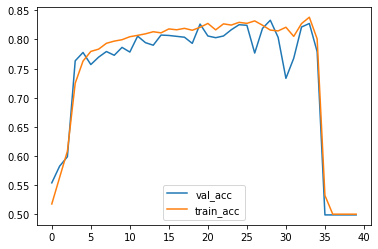

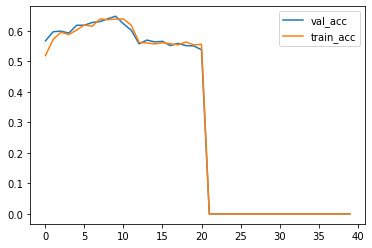

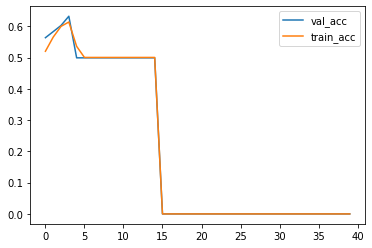

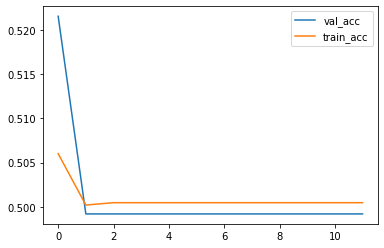

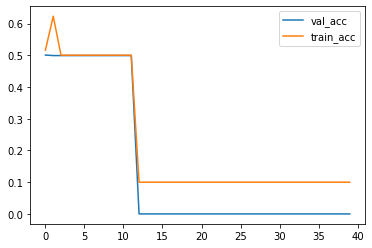

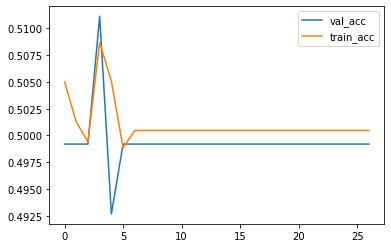

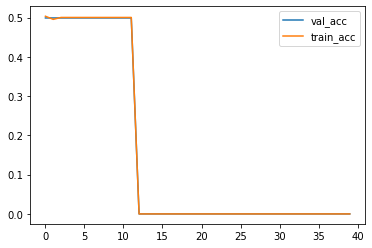

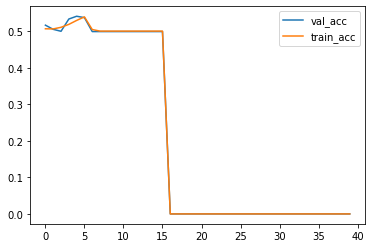

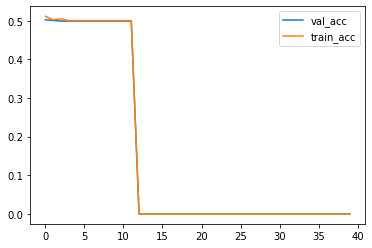

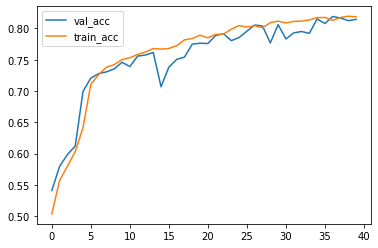

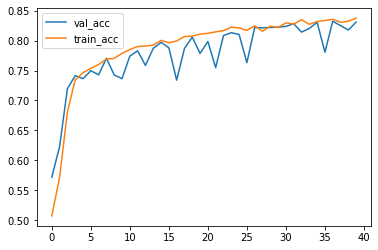

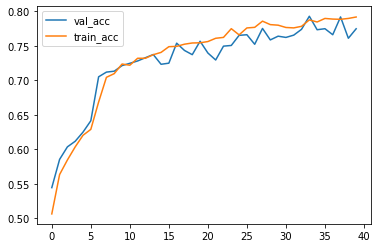

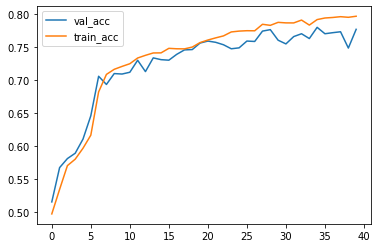

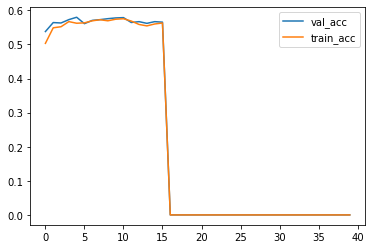

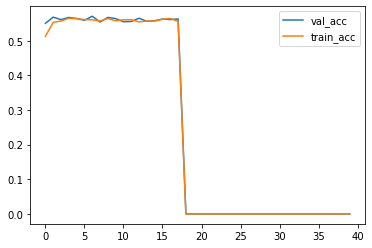

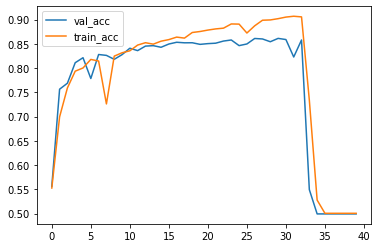

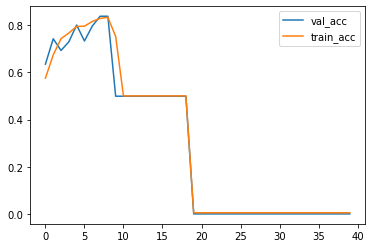

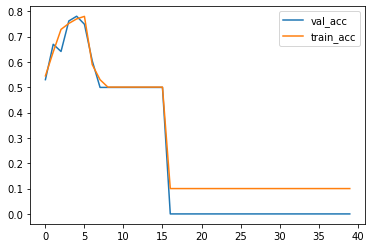

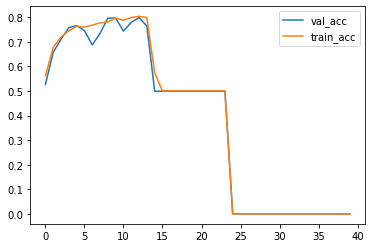

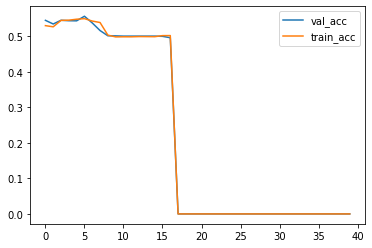

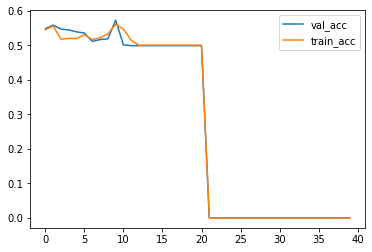

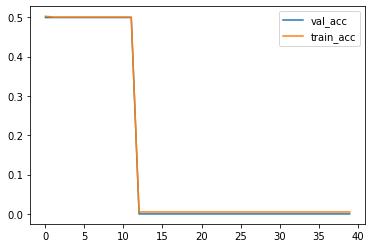

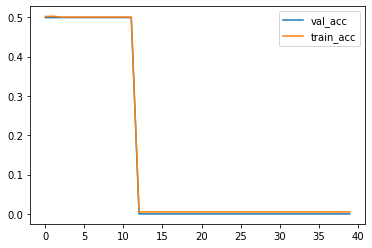

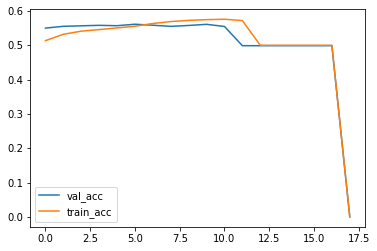

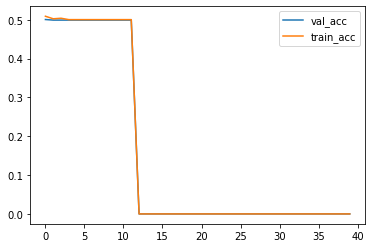

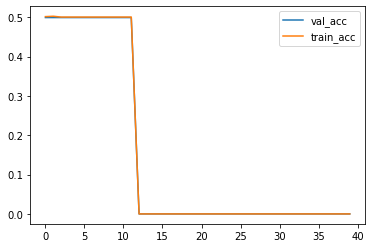

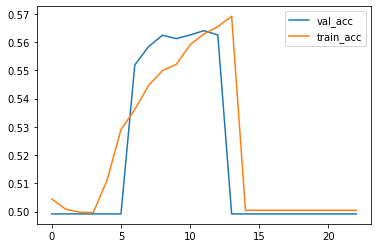

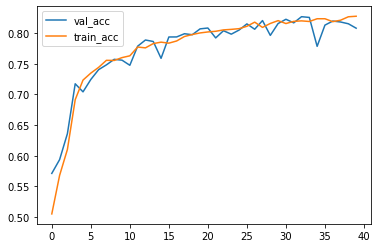

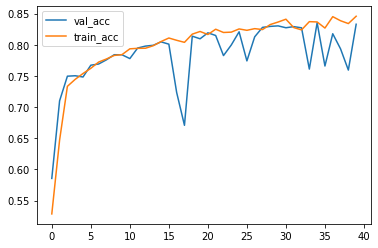

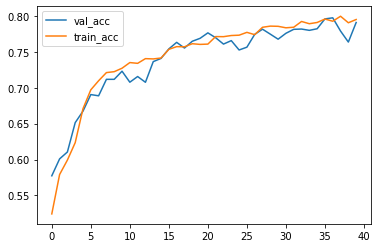

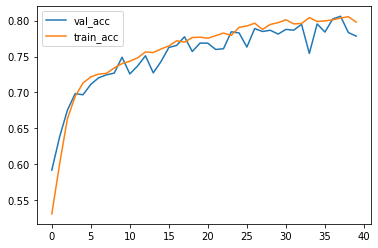

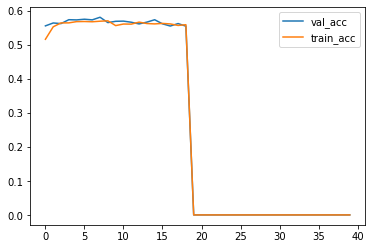

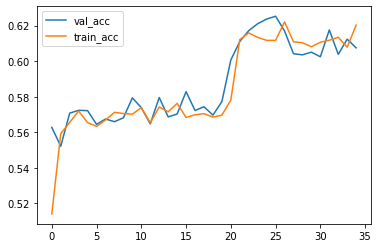

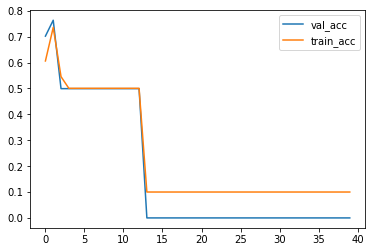

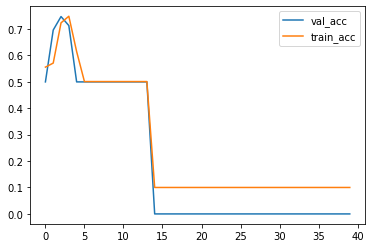

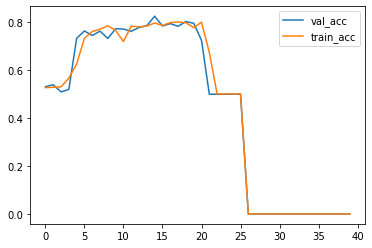

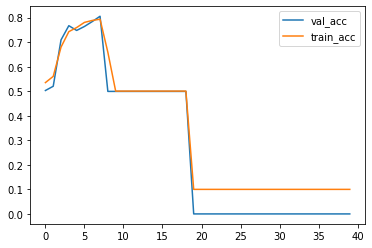

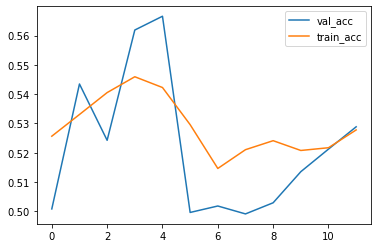

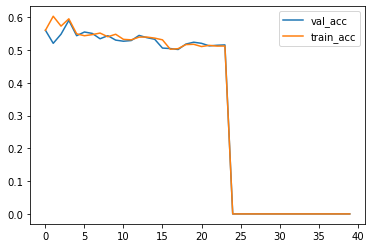

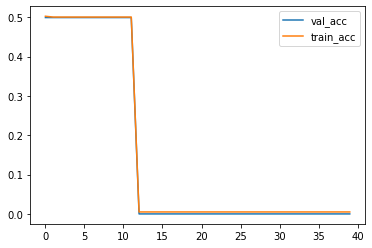

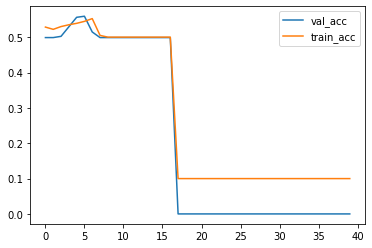

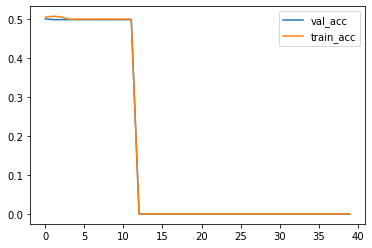

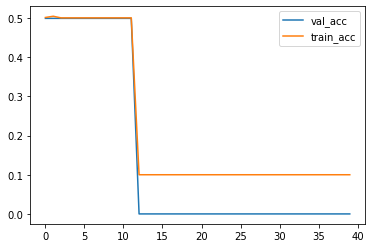

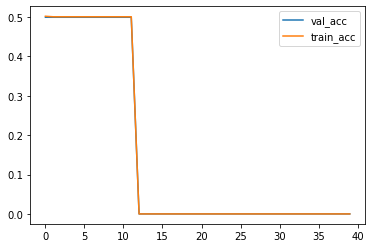

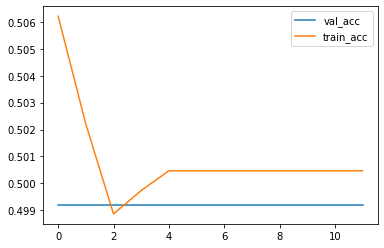

In [463]:
for i, df in enumerate(csvs):
    df[['val_acc', 'train_acc']].plot().get_figure().savefig(f"{folder}/aplots/idx{i}_acc{round(best_accs[i], 2)}_lr{csvs[i].learning_rate[0]}_hu{csvs[i].hidden_units[0]}.png")
